In [10]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\utente\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


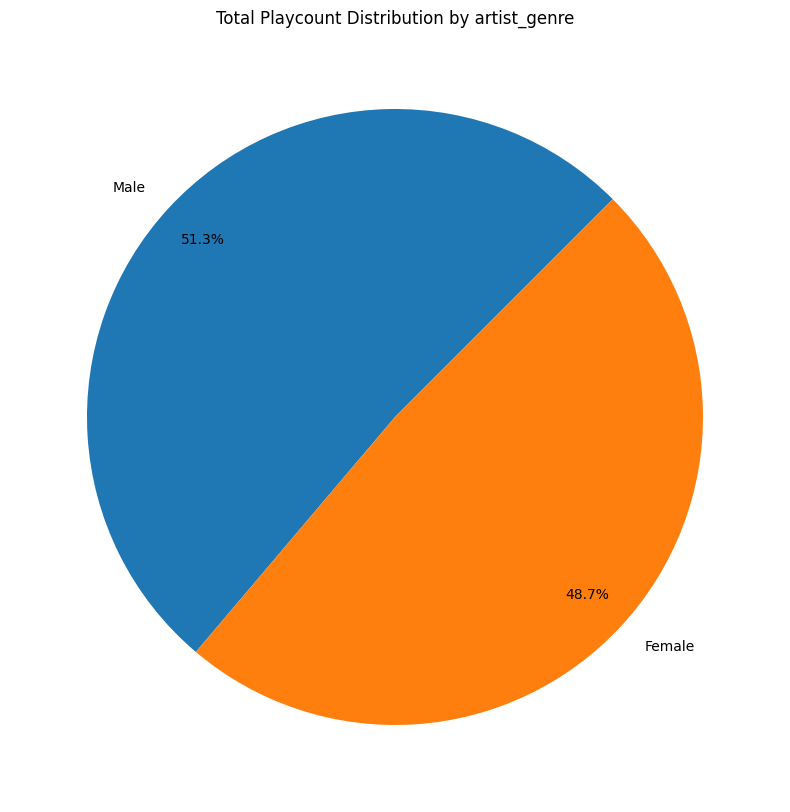

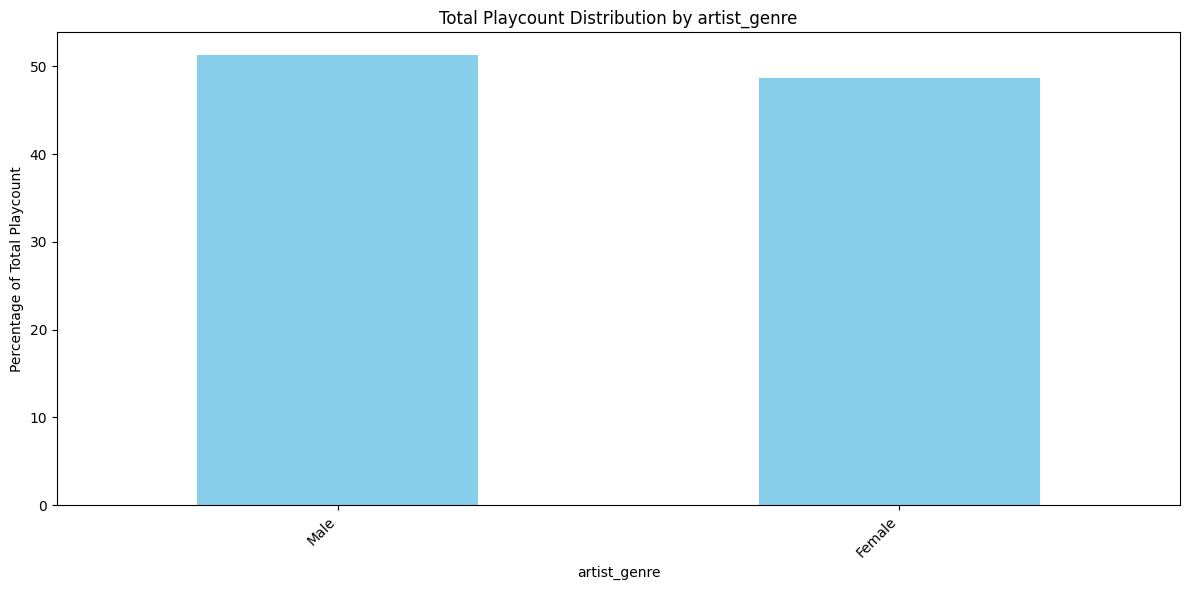

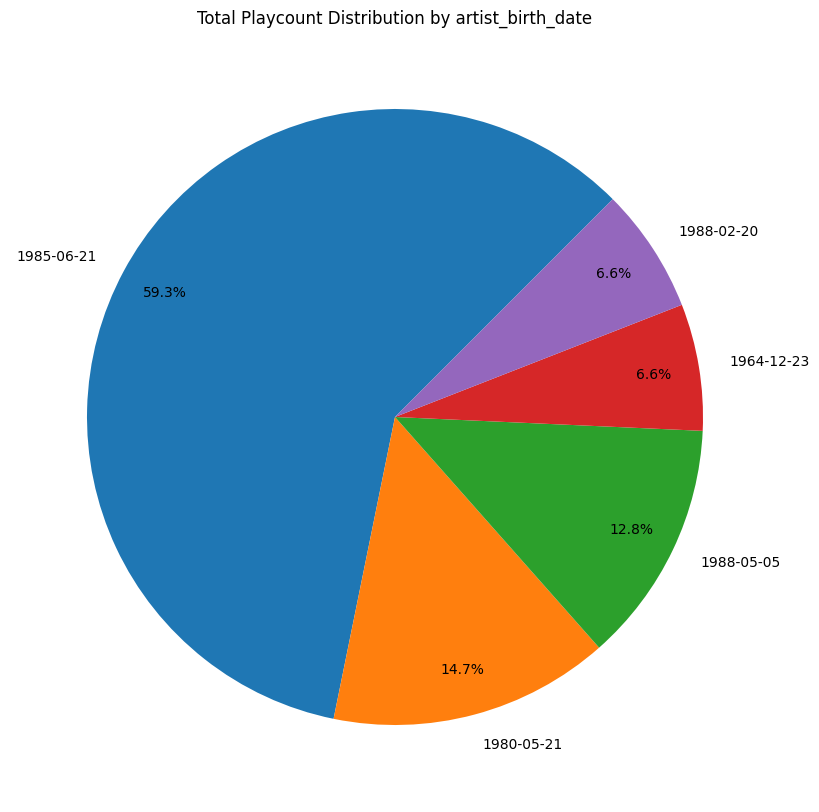

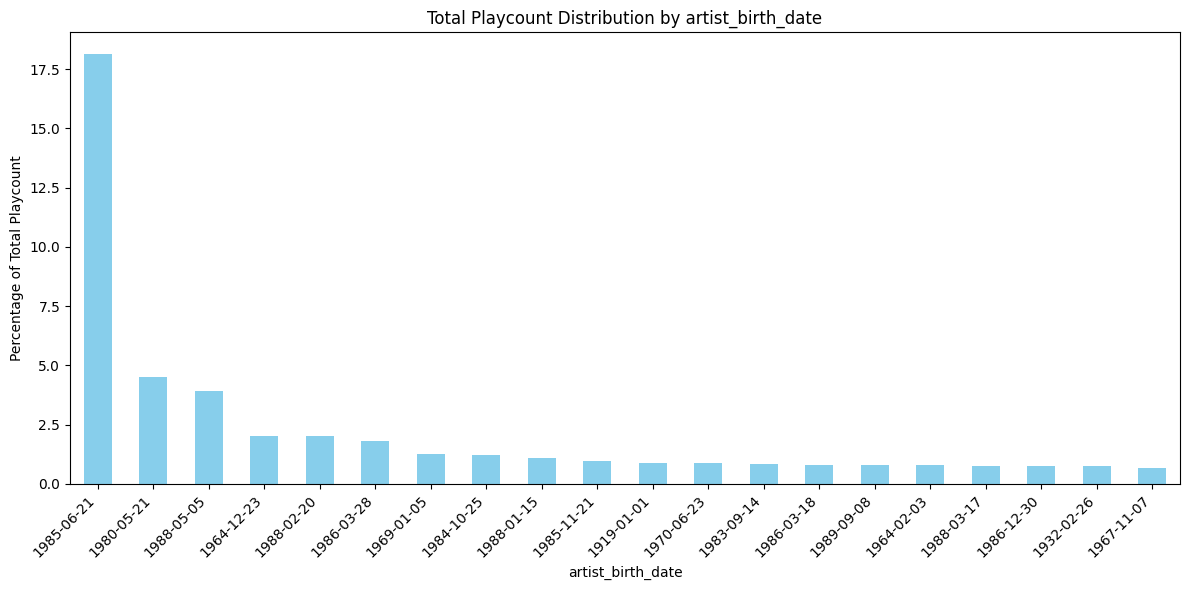

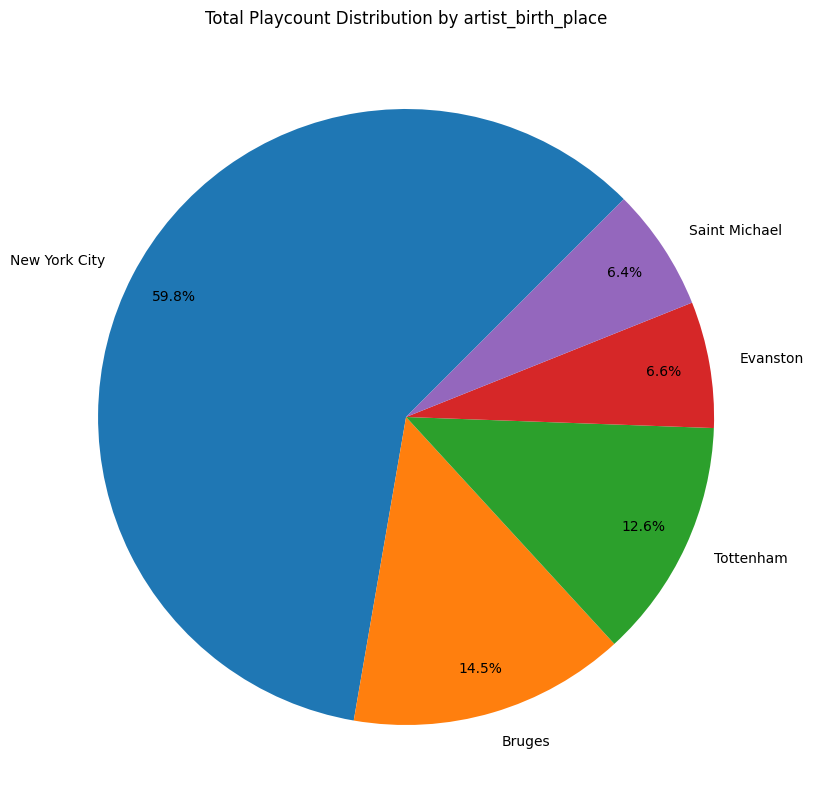

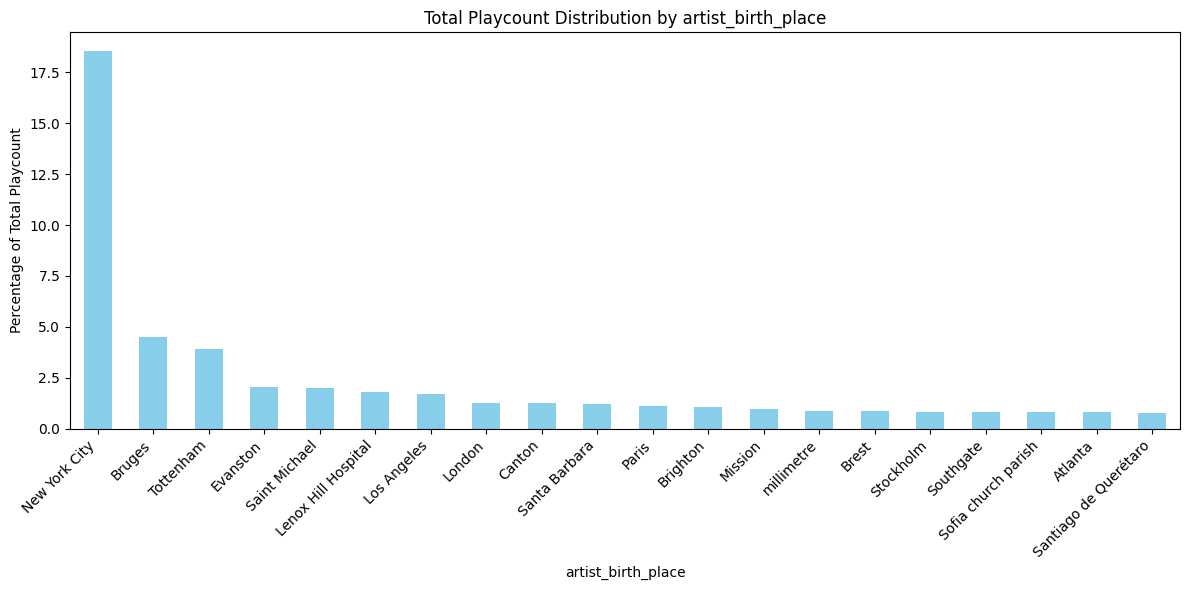

In [15]:
import matplotlib.pyplot as plt

# Define a function to remove "T00:00:00Z" from date strings
def remove_date_suffix(date_str):
    # Replace "T00:00:00Z" with an empty string
    cleaned_date = date_str.replace("T00:00:00Z", "")
    
    # Replace the first two characters with '19'
    cleaned_date = '19' + cleaned_date[2:] if len(cleaned_date) >= 4 else cleaned_date
    
    return cleaned_date

# Load the dataset, apply the converter to the relevant columns
converters = {'artist_birth_date': remove_date_suffix}
# Load the dataset
df = pd.read_csv("user_augmentation.csv", converters=converters)
# Filtra il DataFrame per includere solo 'Male' e 'Female' nell'artist_genre
filtered_df = df[df['artist_genre'].isin(['Male', 'Female'])]

# Assuming the dataset columns are 'user_id', 'track_id', 'interaction_count', 'total_playcount',
# 'track_name', 'artist_name', 'artist_genre', 'artist_birth_date', 'artist_birth_place'

# Group by demographic attributes (e.g., 'artist_genre', 'artist_birth_date', 'artist_birth_place')
demographic_groups = ['artist_genre', 'artist_birth_date', 'artist_birth_place']

for demographic_attribute in demographic_groups:
    # Group by demographic attribute
    grouped_data = filtered_df.groupby(demographic_attribute)

    # Calcola la distribuzione delle preferenze (e.g., 'total_playcount')
    distribution = grouped_data['total_playcount'].sum() / filtered_df['total_playcount'].sum() * 100
    
    # Mantieni solo i primi 2 valori
    distribution_pie = distribution.nlargest(2)

    # Visualizzazione: Grafico a torta
    plt.figure(figsize=(20, 10))
    if demographic_attribute == 'artist_genre':
        plt.pie(distribution_pie, labels=distribution_pie.index, startangle=45, autopct='%1.1f%%', pctdistance=0.85)
    else:
        plt.pie(distribution.nlargest(5), labels=distribution.nlargest(5).index, startangle=45, autopct='%1.1f%%', pctdistance=0.85)
    plt.title(f'Total Playcount Distribution by {demographic_attribute}')
    plt.show()

    # Visualizzazione: Grafico a barre
    plt.figure(figsize=(12, 6))
    distribution.sort_values(ascending=False).head(20).plot(kind='bar', color='skyblue')
    plt.title(f'Total Playcount Distribution by {demographic_attribute}')
    plt.xlabel(demographic_attribute)
    plt.ylabel('Percentage of Total Playcount')
    plt.xticks(rotation=45, ha='right')  # Ruota le etichette dell'asse x per una migliore leggibilità
    
    plt.tight_layout()
    plt.show()
